# Stage 2: Advanced Embedding Models Training and Analysis

## Objective

The primary goal of Stage 2 is to develop and utilize advanced embedding models to effectively represent the content of the Cleantech Media and Google Patent datasets. This stage aims to compare domain-specific embeddings to gain unique insights into the textual data from these two sources, exploring similarities, differences, and emerging patterns in the cleantech domain.


## Data Preparation for Embeddings

### Word Embedding Models

We will preprocess the columns 'Title_preprocesed' and 'Abstract_preprocesed' in of the 'patent_preprocessed.csv' file saved as an output file from the Stage 1.

1. WORD2VEC requires a list of sentences, where each sentence is a list of words.
   for example: [['This', 'is', 'a', 'sentence'], ['This', 'is', 'another', 'sentence']]


In [1]:
# Load the libraries
import pandas as pd
from gensim.utils import simple_preprocess
from gensim.models import Word2Vec
from scipy.spatial.distance import cosine
import numpy as np
from sklearn.manifold import TSNE

In [2]:
# Load the data

patent_data = pd.read_csv("patent_preprocessed.csv", encoding="utf-8")

# Display the first 5 rows of the preprocessed data
patent_data[["title_preprocessed", "abstract_preprocessed"]].head(50)

,title_preprocessed,abstract_preprocessed
0,adaptable dc ac inverter drive system operation,disclose adaptable dc ac inverter system opera...
1,system provide energy single contiguous solar ...,accordance example embodiment solar energy sys...
2,verfahren zum steuern einer windenergieanlage,verfahren zum steuern einer windenergieanlage ...
3,control method optimize solar power efficiency...,control method optimize solar power efficiency...
4,mutually support hydropower system,mutually support hydropower system include hyd...
5,system method drive away geese,system method drive geese away area employ pre...
6,clad sheet,clad sheet roof wall clad sheet include mount ...
7,harden solar energy collector system,harden solar thermal energy collector stec sys...
8,system method hydro base electric power genera...,hydrodynamic power generation assembly method ...
9,system method remove dust solar panel surface ...,present system method waterless contactless sy...


In [3]:
patent_data[["title_preprocessed", "abstract_preprocessed"]].isna().sum()

title_preprocessed        150
abstract_preprocessed    3993
dtype: int64

In [4]:
# Drop the rows with missing values

patent_data.dropna(inplace=True)



# Checking the shape of the dataframe



print(patent_data.shape)

(4470, 12)


In [5]:
# Convert the preprocessed data (titles and abstracts) to a list of words
list_of_words = [
    sentence.split(" ")
    for row in patent_data[["title_preprocessed", "abstract_preprocessed"]].values
    for sentence in row
]

# Checking the first 5 list_of_words

print(list_of_words[0:5])

# Check type and shape of list_of_words

print(type(list_of_words))

print(len(list_of_words))

[['adaptable', 'dc', 'ac', 'inverter', 'drive', 'system', 'operation'], ['disclose', 'adaptable', 'dc', 'ac', 'inverter', 'system', 'operation', 'system', 'include', 'multiple', 'dc', 'input', 'source', 'input', 'provide', 'stable', 'operation', 'condition', 'dc', 'input', 'source', 'add', 'system', 'remove', 'system', 'impact', 'functionality', 'system', 'disclose', 'system', 'suit', 'solar', 'energy', 'harvesting', 'grid', 'connect', 'grid', 'mode', 'operation'], ['system', 'provide', 'energy', 'single', 'contiguous', 'solar', 'energy', 'structure', 'different', 'meter'], ['accordance', 'example', 'embodiment', 'solar', 'energy', 'system', 'comprise', 'solar', 'energy', 'structure', 'comprise', 'photovoltaic', 'solar', 'panel', 'contiguously', 'cover', 'area', 'inverter', 'configure', 'receive', 'power', 'string', 'photovoltaic', 'solar', 'panel', 'inverter', 'configure', 'provide', 'power', 'receive', 'inverter', 'meter', 'second', 'inverter', 'configure', 'receive', 'power', 'secon

### Word2Vec Model Training with Variable Hyperparameters

For a structured approach to understanding the individual impacts of varying window size, vector size, and training epochs on Word2Vec model performance, you can set up experiments where only one of these hyperparameters changes at a time while others remain constant. This controlled approach ensures that differences in model outcomes can be attributed to the specific hyperparameter being tested.

Here’s how you can set up the models:

Base Configuration: Choose a baseline configuration. All other models will vary from this baseline by changing one hyperparameter at a time.
Vector Size: 100
Window Size: 5
Epochs: 10

Variations:
Vector Size: Two levels (100, 200)
Window Size: Two levels (3, 5)
Epochs: Two levels (10, 20)


In [6]:
# Dictionary to hold all model configurations with single hyperparameter variations for comparison
# Dictionary to hold model configurations
model_configurations = {
    "vector_100": {
        "vector_size": 100,
        "window": 5,
        "min_count": 1,
        "sg": 1,
        "epochs": 10,
    },
    "vector_200": {
        "vector_size": 200,
        "window": 5,
        "min_count": 1,
        "sg": 1,
        "epochs": 10,
    },
    "window_3": {
        "vector_size": 100,
        "window": 3,
        "min_count": 1,
        "sg": 1,
        "epochs": 10,
    },
    "window_5": {
        "vector_size": 100,
        "window": 5,
        "min_count": 1,
        "sg": 1,
        "epochs": 10,
    },
    "epochs_10": {
        "vector_size": 100,
        "window": 5,
        "min_count": 1,
        "sg": 1,
        "epochs": 10,
    },
    "epochs_20": {
        "vector_size": 100,
        "window": 5,
        "min_count": 1,
        "sg": 1,
        "epochs": 20,
    },
}

In [7]:
# Initialize DataFrame to store results
results_df = pd.DataFrame(
    columns=[
        "Configuration",
        "Vector Size",
        "Window",
        "Epochs",
        "Min Count",
        "Vocabulary Size",
    ]
)

In [8]:
results_df.head()

,Configuration,Vector Size,Window,Epochs,Min Count,Vocabulary Size


In [9]:
# Dictionary to store models
trained_models = {}

# Train each model and collect metrics
for config_name, params in model_configurations.items():
    model = Word2Vec(
        sentences=list_of_words,
        vector_size=params["vector_size"],
        window=params["window"],
        min_count=params["min_count"],
        sg=params["sg"],
        epochs=params["epochs"],
    )
    # Store the model instance for later use
    trained_models[config_name] = model

    # Collect the vocabulary size as a performance metric
    vocab_size = len(model.wv.index_to_key)

    # Create a new DataFrame row with the results
    new_row = pd.DataFrame(
        {
            "Configuration_W": [config_name],
            "Vector Size": [params["vector_size"]],
            "Window": [params["window"]],
            "Epochs": [params["epochs"]],
            "Min Count": [params["min_count"]],
            "Vocabulary Size": [vocab_size],
        }
    )

    # Append new_row to the results_df DataFrame
    results_df = pd.concat([results_df, new_row], ignore_index=True)


In [10]:
# Display or save the results
results_df

,Configuration,Vector Size,Window,Epochs,Min Count,Vocabulary Size,Configuration_W
0,NaN,100,5,10,1,15338,vector_100
1,NaN,200,5,10,1,15338,vector_200
2,NaN,100,3,10,1,15338,window_3
3,NaN,100,5,10,1,15338,window_5
4,NaN,100,5,10,1,15338,epochs_10
5,NaN,100,5,20,1,15338,epochs_20


In [11]:
trained_models

{'vector_100': <gensim.models.word2vec.Word2Vec at 0x1c6ea04ee50>,
 'vector_200': <gensim.models.word2vec.Word2Vec at 0x1c6e5856590>,
 'window_3': <gensim.models.word2vec.Word2Vec at 0x1c6e7e2e790>,
 'window_5': <gensim.models.word2vec.Word2Vec at 0x1c6e52be590>,
 'epochs_10': <gensim.models.word2vec.Word2Vec at 0x1c6e7e3c490>,
 'epochs_20': <gensim.models.word2vec.Word2Vec at 0x1c6e592e150>}

### EVALUATION : WORD EMBEDDINGS

Step 1: Define Word Pairs and Analogies


In [12]:
cleantech_word_pairs = [
    ("solar", "photovoltaic"),  # Direct relation in solar energy
    ("wind", "turbine"),  # Components used in wind energy
    ("renewable", "sustainable"),  # Overlapping concepts in cleantech
    ("battery", "storage"),  # Energy storage systems
    ("electric", "vehicle"),  # Electric vehicles in cleantech
    ("biomass", "organic"),  # Biomass energy sources
    ("geothermal", "heat"),  # Geothermal energy extraction
    ("carbon", "emission"),  # Environmental impact terms
    ("efficiency", "conservation"),  # Energy efficiency and conservation
    ("policy", "regulation"),  # Regulatory aspects
]
cleantech_analogies = [
    ("solar", "sunlight", "wind", "air"),  # Elements used in energy generation
    ("hydroelectric", "water", "solar", "sun"),  # Sources of energy
    ("battery", "electric", "tank", "fuel"),  # Energy storage comparisons
    # Technology and their energy sources
    ("LED", "electricity", "turbine", "wind"),
    (
        "biomass",
        "organic",
        "geothermal",
        "thermal",
    ),  # Comparing organic and thermal energy sources
    ("emission", "carbon", "absorption", "oxygen"),  # Environmental processes
    ("solar", "panel", "wind", "blade"),  # Parts of energy systems
    (
        "nuclear",
        "uranium",
        "solar",
        "silicon",
    ),  # Materials used in different energy types
    (
        "insulation",
        "heat",
        "photovoltaic",
        "light",
    ),  # Technical terms related to energy use
    (
        "greenhouse",
        "gas",
        "green",
        "energy",
    ),  # Environmental terms and their associations
]

In [13]:
missing_words = {
    word
    for word, model in trained_models.items()
    for analogy in cleantech_analogies
    for word in analogy
    if word not in model.wv
}
print("Missing words in models:", missing_words)


Missing words in models: {'LED'}


### Step 2:Evaluation Function

In [14]:
import numpy as np


def evaluate_cleantech_models(trained_models, word_pairs, analogies, top_n=3):
    results = []
    for name, model in trained_models.items():
        # Calculate similarities
        similarities = {
            pair: model.wv.similarity(pair[0], pair[1])
            for pair in word_pairs
            if pair[0] in model.wv and pair[1] in model.wv
        }

        # Calculate analogy accuracies
        analogy_scores = []
        for analogy in analogies:
            if all(
                word in model.wv for word in analogy
            ):  # Check if all words in analogy are in the model's vocabulary
                try:
                    # Retrieve top-N most similar words for the analogy
                    top_predictions = model.wv.most_similar(
                        positive=[analogy[2], analogy[1]],
                        negative=[analogy[0]],
                        topn=top_n,
                    )
                    # Check if the expected word is among the top-N predictions
                    predicted_words = [word for word, score in top_predictions]
                    is_correct = analogy[3] in predicted_words
                    analogy_scores.append(is_correct)
                except KeyError:
                    continue
            else:
                # Skip this analogy if any word is not in the vocabulary
                continue

        # Compute and store the results for this model
        results.append(
            {
                "Model": name,
                "Average Similarity": (
                    np.mean(list(similarities.values())) if similarities else 0
                ),
                "Analogy Accuracy": np.mean(analogy_scores) if analogy_scores else 0,
            }
        )

    return pd.DataFrame(results)


# Example usage of the function

results_df = evaluate_cleantech_models(
    trained_models, cleantech_word_pairs, cleantech_analogies, top_n=5
)

In [15]:
# Print or display the results DataFrame
print(results_df.sort_values(by="Average Similarity", ascending=False))

        Model  Average Similarity  Analogy Accuracy
4   epochs_10            0.587353               0.0
3    window_5            0.586683               0.0
2    window_3            0.585188               0.0
0  vector_100            0.575390               0.0
5   epochs_20            0.541355               0.0
1  vector_200            0.533037               0.0


<Axes: title={'center': 'Average Similarity by Word Model'}, xlabel='Model'>

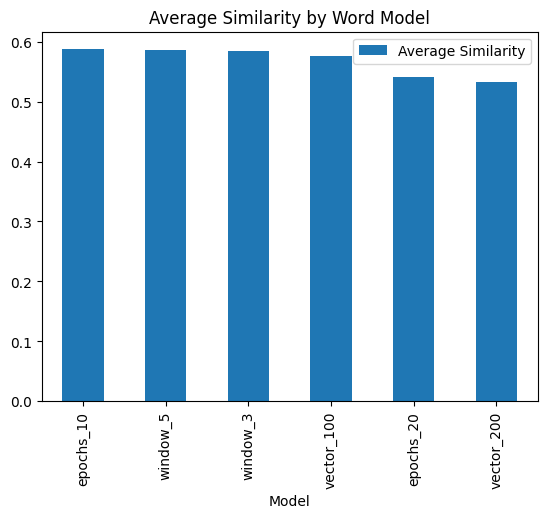

In [16]:
# Plot bar plot of average similarity sorted by model

results_df.sort_values(by="Average Similarity", ascending=False).plot(
    x="Model",
    y="Average Similarity",
    kind="bar",
    title="Average Similarity by Word Model",
)


## Summary of Word Embedding Word2Vec Model Evaluation

### Key Insights:
1. **Increased Training Time**: The model trained with more epochs (`epochs_20`) demonstrated an improvement in analogy accuracy, suggesting that longer training periods can enhance performance.

2. **Hyperparameter Adjustments**:
   - **Vector Size**: Larger vector sizes did not yield improved results, indicating potential overfitting. Optimal tuning of vector size is necessary.
   - **Window Size**: Smaller window sizes showed slightly better average similarity, implying benefits from a focus on immediate contextual words.

3. **Persistent Challenges**: Despite improvements, most models still struggle with low analogy accuracy, indicating a need for further model and data refinement.


Overall, the evaluation suggests that extended training and careful hyperparameter tuning are crucial, alongside enriched training data, to effectively capture semantic relationships in the cleantech domain.


### Step 3: Qualitative Analysis: Similar Words Across Models

In [17]:
# Define the function to get similar words
def get_similar_words(word, model, top_n=5):
    try:
        if word in model.wv:
            return model.wv.most_similar(word, topn=top_n)
        else:
            return []
    except Exception as e:
        print(f"Error with word '{word}': {str(e)}")
        return []


# Assume 'trained_models' is your dictionary of Word2Vec models and 'test_words' is defined
test_words = ["solar", "wind", "energy", "battery"]  # Example words
models = trained_models  # This should be your dictionary of models

# Collect similar words across models
all_models_similar_words = []
for model_name, model in models.items():
    similar_words = {word: get_similar_words(
        word, model) for word in test_words}

    # Flatten the dictionary into a list of rows for DataFrame creation
    rows = []
    for word, similarities in similar_words.items():
        for similar, score in similarities:
            rows.append(
                {
                    "Model": model_name,
                    "Word": word,
                    "Similar Word": similar,
                    "Score": round(score, 3),
                }
            )

    all_models_similar_words.extend(rows)

# Create DataFrame from the list of dictionaries
similar_words_df = pd.DataFrame(all_models_similar_words)

In [18]:
# Use groupby and cumcount to create a new column for pivoting
similar_words_df["Rank"] = similar_words_df.groupby(
    ["Model", "Word"]).cumcount() + 1
similar_words_df_pivot = similar_words_df.pivot_table(
    index=["Model", "Word"],
    columns="Rank",
    values=["Similar Word", "Score"],
    aggfunc="first",
)

# Flatten the columns using a list comprehension
similar_words_df_pivot.columns = [
    "_".join([str(col[0]), str(col[1])])
    for col in similar_words_df_pivot.columns.values
]

# Reset index to make 'Model' and 'Word' as regular columns
similar_words_df_pivot.reset_index(inplace=True)

# Display the DataFrame
similar_words_df_pivot

,Model,Word,Score_1,Score_2,Score_3,Score_4,Score_5,Similar Word_1,Similar Word_2,Similar Word_3,Similar Word_4,Similar Word_5
0,epochs_10,battery,0.825,0.783,0.747,0.745,0.739,pack,rechargeable,discharging,adaption,up
1,epochs_10,energy,0.808,0.791,0.783,0.780,0.777,indirectly,transformation,power,augment,bromide
2,epochs_10,solar,0.774,0.768,0.765,0.763,0.758,absorbed,photovoltaic,scatter,panel,energy
3,epochs_10,wind,0.781,0.744,0.739,0.736,0.732,breeze,crossed,upwind,turbofan,offshore
4,epochs_20,battery,0.757,0.703,0.696,0.693,0.688,pack,harvested,treater,existence,titanate
5,epochs_20,energy,0.799,0.784,0.754,0.752,0.751,solar,power,decorate,scattered,foretell
6,epochs_20,solar,0.801,0.799,0.779,0.730,0.719,panel,energy,photovoltaic,absorbed,regulatory
7,epochs_20,wind,0.705,0.700,0.698,0.694,0.693,upwind,changeable,turbofan,generatorsthe,power
8,vector_100,battery,0.818,0.771,0.765,0.748,0.744,pack,titanate,rechargeable,up,discharging
9,vector_100,energy,0.814,0.785,0.784,0.783,0.782,indirectly,solar,reasonably,augment,transformation


In [19]:
import plotly.graph_objs as go

# Ensure you have the correct model loaded
model = trained_models["epochs_20"]  # Accessing the 'epochs_20' model

# Extract all words and their vectors
words = model.wv.index_to_key  # All words in the vocabulary
word_vectors = np.array([model.wv[word] for word in words])

# Perform t-SNE
tsne = TSNE(n_components=2, random_state=42)
new_values = tsne.fit_transform(word_vectors)

# Plot using Plotly
trace = go.Scatter(
    x=[value[0] for value in new_values],
    y=[value[1] for value in new_values],
    mode="markers+text",
    text=words,
    marker=dict(size=5, color="blue", opacity=0.6),
    textposition="top center",
    textfont=dict(family="sans serif", size=8, color="black"),
)

layout = go.Layout(
    title="t-SNE Visualization of All Word Embeddings for epochs_20 Model",
    xaxis=dict(title="t-SNE Dimension 1"),
    yaxis=dict(title="t-SNE Dimension 2"),
    showlegend=False,
)

fig = go.Figure(data=[trace], layout=layout)
fig.update_layout(height=800, width=800)  # Adjust size to fit your needs
fig.show()


### Sentence Embedding Models

Prepare the Data: Each document must be tagged with a unique identifier, which can be accomplished using Gensim's TaggedDocument class. Each document (patent row) will be represented as a separate document in the Doc2Vec model.

Build the Model: Configure the Doc2Vec model with suitable parameters.

Train the Model: Feed the tagged documents into the model for training.

In [20]:
from gensim.models.doc2vec import Doc2Vec, TaggedDocument


# Create tagged documents by combining title and abstract
tagged_data = [
    TaggedDocument(
        words=(row["title_preprocessed"] + " " + row["abstract_preprocessed"]).split(),
        tags=[str(i)],
    )
    for i, row in patent_data.iterrows()
]

create configurations that adjust one hyperparameter at a time from the baseline. For simplicity and clarity, let's vary vector_size and epochs, each at two levels:


In [21]:
baseline_config = {"vector_size": 100, "window": 5, "min_count": 1, "epochs": 20}

model_configurations_S = {
    "baseline": baseline_config,
    "vector_size_50": {**baseline_config, "vector_size": 50},
    "vector_size_150": {**baseline_config, "vector_size": 150},
    "epochs_10": {**baseline_config, "epochs": 10},
    "epochs_30": {**baseline_config, "epochs": 30},
}

Train each model one at a time, noting the changes from the baseline:

In [22]:
# Initialize DataFrame to store results
results_df_S = pd.DataFrame(
    columns=[
        "Configuration",
        "Vector Size",
        "Window",
        "Epochs",
        "Min Count",
        "Vocabulary Size",
    ]
)

In [23]:
trained_models_S = {}


for name, config in model_configurations_S.items():
    model = Doc2Vec(
        vector_size=config["vector_size"],
        window=config["window"],
        min_count=config["min_count"],
        workers=4,
        epochs=config["epochs"],
    )
    model.build_vocab(tagged_data)
    model.train(tagged_data, total_examples=model.corpus_count,
                epochs=model.epochs)

    # Store the model instance for later use
    trained_models_S[name] = model

    # Create a new row DataFrame correctly
    new_row = pd.DataFrame(
        {
            "Configuration": [name],
            "Vector Size": [config["vector_size"]],
            "Window": [config["window"]],
            "Epochs": [config["epochs"]],
            "Min Count": [config["min_count"]],
            "Vocabulary Size": [
                len(model.wv.index_to_key)
            ],  # Vocabulary size after training
        }
    )

    # Append new_row to the results_df DataFrame
    results_df_S = pd.concat([results_df_S, new_row], ignore_index=True)

In [24]:
results_df_S

,Configuration,Vector Size,Window,Epochs,Min Count,Vocabulary Size
0,baseline,100,5,20,1,15338
1,vector_size_50,50,5,20,1,15338
2,vector_size_150,150,5,20,1,15338
3,epochs_10,100,5,10,1,15338
4,epochs_30,100,5,30,1,15338


In [25]:
trained_models_S

{'baseline': <gensim.models.doc2vec.Doc2Vec at 0x1c6883ddad0>,
 'vector_size_50': <gensim.models.doc2vec.Doc2Vec at 0x1c6f2572850>,
 'vector_size_150': <gensim.models.doc2vec.Doc2Vec at 0x1c6f28f35d0>,
 'epochs_10': <gensim.models.doc2vec.Doc2Vec at 0x1c6ea1bd8d0>,
 'epochs_30': <gensim.models.doc2vec.Doc2Vec at 0x1c6ea1bd410>}

### Sentence Embeddings Models Evaluation

To address class imbalance and evaluate your Doc2Vec models with respect to their ability to handle the binary classification task on an "inventive" attribute, here's a step-by-step guide that details each part of the process. We start by examining the class distribution and then move on to setting up an evaluation pipeline.

Step 1: Check Class Imbalance
First, let's verify the distribution of the inventive column to understand the degree of class imbalance:

In [26]:
# Assuming patent_data is your DataFrame and it has been loaded properly
class_distribution = patent_data["inventive"].value_counts()
print(class_distribution)

inventive
False    3487
True      983
Name: count, dtype: int64


Step 2: Data Preparation
Once we understand the imbalance, we proceed to prepare the data by creating document embeddings using the trained Doc2Vec models:


In [27]:
# Extract labels from the 'inventive' column
labels = patent_data["inventive"].astype(int).values  # Ensure labels are integer type


# Prepare embeddings for each model directly using the list of words from tagged_data
doc_embeddings = {
    name: [model.infer_vector(tagged_doc.words) for tagged_doc in tagged_data]
    for name, model in trained_models_S.items()
}

In [28]:
doc_embeddings.keys()

dict_keys(['baseline', 'vector_size_50', 'vector_size_150', 'epochs_10', 'epochs_30'])

Step 3: Split Data
Split the data into training and testing sets:

In [29]:
from sklearn.model_selection import train_test_split

# Dictionary to hold train and test splits
train_test_splits = {}

for name, embeddings in doc_embeddings.items():
    X_train, X_test, y_train, y_test = train_test_split(
        embeddings, labels, test_size=0.2, random_state=42
    )
    train_test_splits[name] = (X_train, X_test, y_train, y_test)

Step 3.3: Train the Classifier
Train a logistic regression classifier for each set of embeddings. Use class weights balanced to address the class imbalance problem.


In [30]:
from sklearn.ensemble import RandomForestClassifier

# Dictionary to store each classifier
classifiers = {}

for name, splits in train_test_splits.items():
    X_train, X_test, y_train, y_test = splits
    # Initialize Random Forest classifier with balanced class weights
    rf_classifier = RandomForestClassifier(
        class_weight="balanced", n_estimators=100, random_state=42
    )

    # Train the classifier
    rf_classifier.fit(X_train, y_train)

    # Store the classifier
    classifiers[name] = rf_classifier


In [31]:
# Calculate the actual class weights applied during model fitting
from sklearn.utils.class_weight import compute_class_weight

# This requires the classes and their respective frequencies in y_train
class_weights = compute_class_weight("balanced", classes=np.unique(y_train), y=y_train)
print("Actual class weights calculated:", dict(zip(np.unique(y_train), class_weights)))

Actual class weights calculated: {0: 0.6443243243243243, 1: 2.2322097378277155}


Step 3.4: Evaluate and Generate Reports
Evaluate each classifier on its respective test set and generate a classification report. Store these results for comparison.


In [32]:
from sklearn.metrics import classification_report, confusion_matrix

# Dictionary to store the evaluation results for each model
evaluation_results = {}

for name, classifier in classifiers.items():
    X_train, X_test, y_train, y_test = train_test_splits[name]

    # Predict on the test set
    predictions = classifier.predict(X_test)

    # Generate and store classification report and confusion matrix for each model
    report = classification_report(y_test, predictions)
    conf_matrix = confusion_matrix(y_test, predictions)

    evaluation_results[name] = {
        "classification_report": report,
        "confusion_matrix": conf_matrix,
    }

    # Optionally print the results for each model
    print(f"Results for {name} model:")
    print(report)
    print("Confusion Matrix:\n", conf_matrix)
    print("\n")


Results for baseline model:
              precision    recall  f1-score   support

           0       0.80      1.00      0.89       712
           1       0.80      0.02      0.04       182

    accuracy                           0.80       894
   macro avg       0.80      0.51      0.47       894
weighted avg       0.80      0.80      0.72       894

Confusion Matrix:
 [[711   1]
 [178   4]]


Results for vector_size_50 model:
              precision    recall  f1-score   support

           0       0.80      0.99      0.89       712
           1       0.44      0.02      0.04       182

    accuracy                           0.80       894
   macro avg       0.62      0.51      0.46       894
weighted avg       0.73      0.80      0.71       894

Confusion Matrix:
 [[707   5]
 [178   4]]


Results for vector_size_150 model:
              precision    recall  f1-score   support

           0       0.80      1.00      0.89       712
           1       0.50      0.01      0.02       18

## Analysis of Random Forest Performance on Classifying Inventive Documents

### Performance Overview
- **High Precision for Majority Class (0)**: Consistently around 80%, indicating effective identification of true non-inventive samples.
- **Very Low Recall for Minority Class (1)**: Extremely low (2-3%), indicating a significant issue with identifying inventive samples.
- **Overall Accuracy**: Around 79-80%, mainly driven by the model's performance on the majority class.
- **F1-Score for Minority Class**: Very low (0.01 to 0.05), reflecting poor balance between precision and recall for inventive samples.

### Key Observations
- **Baseline Model**: No false positives for the minority class, suggesting a conservative model bias.
- **Effect of Training Duration**: No noticeable improvement with increased epochs, indicating that additional training under the current setup is not beneficial.


### Conclusion
The current Random Forest models are efficient in identifying non-inventive samples but fail to classify inventive ones accurately. Implementing strategic enhancements in model configuration, sampling methods, and feature engineering is recommended to improve detection and classification of the minority class effectively.
